In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
fuel_df = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')

**Record_id** : record id

**Utility_id_ferc1**: Utility id assigned by the FERC

**Report_year**: year of report

**Plant_name_ferc1**: the name of the plant

**Fuel_type_code_pudl**: the type of fuel

**Fuel_unit**: the unit of fuel

**Fuel_qty_burned**: the quantity of fuel burned

**Fuel_mmbtu_per_unit**: the measure of energy per unit

**fuel_cost_per_unit_burned**: the fuel cost per unit burned

**Fuel_cost_per_unit_delivered**: the cost of fuel delivered per unit

**fuel_cost_per_mmbtu**: the cost of fuel per mmbtu

In [4]:
fuel_df.head(5)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


**Which of the following fuel type code has the lowest average fuel cost per unit burned?**

In [20]:
fuel_df.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean().sort_values()

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

**What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?**

In [42]:
print(round(fuel_df['fuel_mmbtu_per_unit'].std(), 2))
print(round(fuel_df['fuel_mmbtu_per_unit'].quantile([.75]), 2))

10.6
0.75    17.01
Name: fuel_mmbtu_per_unit, dtype: float64


**What is the skewness and kurtosis for the fuel quantity burned in two decimal places?**

In [44]:
print(round(fuel_df['fuel_qty_burned'].skew(), 2))
print(round(fuel_df['fuel_qty_burned'].kurtosis(), 2))

15.85
651.37


**Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places?**

In [49]:
fuel_df[fuel_df.isnull()].count()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

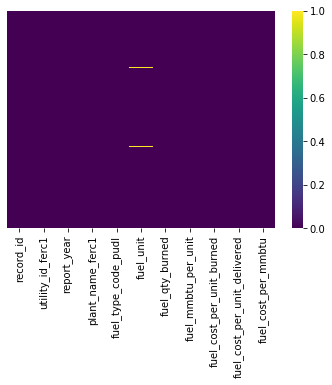

In [72]:
sns.heatmap(fuel_df.isnull(), yticklabels=False, cmap='viridis')

In [114]:
fuel_df[fuel_df['fuel_unit'].isna()]['fuel_unit']

66       NaN
152      NaN
277      NaN
626      NaN
627      NaN
        ... 
28413    NaN
28828    NaN
28830    NaN
29052    NaN
29053    NaN
Name: fuel_unit, Length: 180, dtype: object

In [118]:
180/fuel_df.shape[0] * 100

0.609694136774718

**Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?**

In [119]:
fuel_df.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [147]:
fuel_df.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].count()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_cost_per_unit_burned, dtype: int64

**Which year has the highest average fuel cost per unit delivered?**

In [129]:
fuel_df.groupby('report_year')['fuel_cost_per_unit_delivered'].mean().sort_values(ascending=False)

report_year
1997    11140.197239
1996     9196.705948
2000      985.362877
2009      652.694163
2018      499.269966
2015      326.535511
1998      287.154420
2014      192.737183
2013      172.307591
2004      139.524275
2016      103.901761
2010       91.862105
1994       63.636060
2012       60.994502
2001       60.050396
2011       59.774667
2008       58.588197
2003       55.663493
2002       47.594361
2017       46.196861
2007       43.325023
2005       41.438184
2006       38.657484
1995       32.735269
1999       25.551627
Name: fuel_cost_per_unit_delivered, dtype: float64